<a href="https://colab.research.google.com/github/strifale/Data-Science-for-Health-and-Medicine/blob/master/Skin_Scanner_IdentifyVariousSkinDiseases_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import os
!pwd
os.chdir("/content")
!pwd
!rm -rf cloned-repo


/content
/content


# MIT BeaverWorks Summer Institute- Medlytics 2nd Place Winner 2019

### **Sample data output using model**

CNNs are common used for skin cancer, but not so much for skin disease because of common features sharing in most skin diseases. However, this model is an attempt to try to distingiush 3 main skin diseases. 

### Main Question: Can we use an image to predict whether someone has eczema, psoriasis, tinea, or no disease?
Eczema:

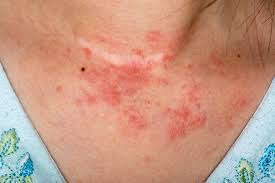

Psoriasis: 

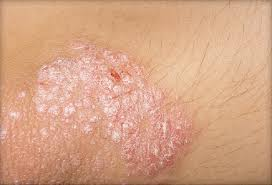


Tinea:

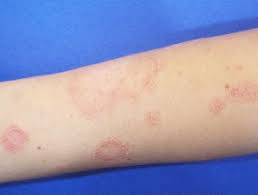



Some Quick Stats:

*   31.6 million in U.S. have eczema
*   8 million in U.S. have psoriasis
*   3 million U.S. tinea cases / year
*   Treatment available for each

Downloaded images from DermNet (Training/Testing data) & 11k Hands (Control Group)

In [0]:
# Clone the entire repo (for skin disease)
!git clone -l -s https://github.com/day-students/DermNet-Crawl.git cloned-repo
%cd cloned-repo
!ls -lrt


Cloning into 'cloned-repo'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 3798 (delta 0), reused 54 (delta 0), pack-reused 3743
Receiving objects: 100% (3798/3798), 334.87 MiB | 58.94 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (3841/3841), done.
/content/cloned-repo
total 24
-rw-r--r-- 1 root root  473 Aug 11 20:17 README.md
drwxr-xr-x 3 root root 4096 Aug 11 20:17 data
-rw-r--r-- 1 root root 3167 Aug 11 20:17 derm-nz.py
drwxr-xr-x 3 root root 4096 Aug 11 20:17 nz
-rw-r--r-- 1 root root 4257 Aug 11 20:17 derm.py


In [0]:
!git clone -l -s https://github.com/day-students/skin-scanner.git
%cd cloned-repo
!ls -lrt

Cloning into 'skin-scanner'...
remote: Enumerating objects: 1039, done.
remote: Counting objects: 100% (1039/1039), done.
remote: Compressing objects: 100% (1036/1036), done.
remote: Total 1039 (delta 3), reused 1032 (delta 1), pack-reused 0
Receiving objects: 100% (1039/1039), 551.94 MiB | 46.10 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (1025/1025), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content/cloned-repo
total 28
-rw-r--r-- 1 root root  473 Aug 11 20:17 README.md
drwxr-xr-x 3 root root 4096 Aug 11 20:17 data
-rw-r--r-- 1 root root 3167 Aug 11 20:17 derm-nz.py
drwxr-xr-x 3 root root 4096 Aug 11 20:17 nz
-rw-r--r-- 1 root root 4257 Aug 11 20:17 derm.py
drwxr-xr-x 4 root root 4096 Aug 11 20:17 skin-scanner


**Standard imports**

In [0]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import os
import PIL
from PIL import Image

from skimage import data
from skimage.color import rgb2hsv

Below is a function that creates a new folder and preprocesses the images by resizing 

In [0]:
def ResizeImages(diseaseType):
  
  filepath = '/content/cloned-repo/data/disease/'+ diseaseType + "/"
  dirName = '/content/cloned-repo/data/disease/Processed/'
  %mkdir $dirName
  dirName = dirName+diseaseType
  %mkdir $dirName
  %cd $dirName
  #print("Hopeful", os.getcwd())
  Destination = dirName
  #print("FINALE DESTINATION", Destination)
  #print(filepath)
  %cd $filepath
  #print("NewFilePath", os.getcwd())
  #print("FILE", filepath)
  if(os.getcwd() == "/content/cloned-repo/data/disease/Skin_pics"):
     
      for file in sorted(os.listdir(filepath)):
        image = Image.open(filepath + '/' + file)
        img = image.resize((224, 224))
        Filler = "/"+file[:-4]+"Resized.jpg"
        Des = Destination+Filler
        %cd $Destination
        img.save(Des, "JPEG", optimize=True)
  else:

    for folder in sorted(os.listdir(filepath)):
      val = filepath+folder
      %cd $val

      for file in sorted(os.listdir(val)):
        image = Image.open(val + "/"+file)
        #print(file)
        img = image.resize((224, 224))
        #arr = np.array(img, dtype=np.uint8)
        #arr = arr/255 #This centers the mean to 0- try making a color box too
        #img2 = Image.fromarray(arr.astype('uint8'), 'RGB')
        Filler = "/"+file[:-4]+"Resized.jpg"
        #print("FIller: ", Filler)
        Des = Destination+Filler
        #print(Des)
        %cd $Destination
        img.save(Des, "JPEG", optimize=True)
        #ProcessedImage = plt.imread(Des)
        #print(Filler, ProcessedImage)
        #print(filename, get_num_pixels(filename))

**Changes directory**

In [0]:
import shutil
shutil.move("/content/cloned-repo/skin-scanner/Skin_pics", "/content/cloned-repo/data/disease/")

'/content/cloned-repo/data/disease/Skin_pics'

In [0]:
ResizeImages("Psoriasis")
ResizeImages("eczema")
ResizeImages("Tinea")
ResizeImages("Skin_pics")

**Importing all the necessary packages and layers for tensorflow with keras**

In [0]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Reshape
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import KFold

from keras.layers import BatchNormalization


Using TensorFlow backend.


**Appending modified pictures RGB values into list**

In [0]:

skinPics = []
Psoriasis = []
Tinea = []
Eczema = []
for folder in sorted(os.listdir("/content/cloned-repo/data/disease/Processed")):
  if folder == "Psoriasis":
    path = "/content/cloned-repo/data/disease/Processed"+"/"+folder + "/"
    %cd $path
    for file in sorted(os.listdir(path)): 
      Psoriasis.append(mpimg.imread(file))
  elif folder == "Tinea":
    path = "/content/cloned-repo/data/disease/Processed"+"/"+folder + "/"
    %cd $path
    for file in sorted(os.listdir(path)): 
      #print(file)
      Tinea.append(mpimg.imread(file))
  elif folder == "eczema":
    path = "/content/cloned-repo/data/disease/Processed"+"/"+folder + "/"
    %cd $path
    for file in os.listdir(path): 
      #print(file)
      Eczema.append(mpimg.imread(file))
  elif folder == "Skin_pics":
    path = "/content/cloned-repo/data/disease/Processed"+"/"+folder + "/"
    %cd $path
    for file in sorted(os.listdir(path)): 
      #print(file)
      skinPics.append(mpimg.imread(file))
      

/content/cloned-repo/data/disease/Processed/Psoriasis
/content/cloned-repo/data/disease/Processed/Skin_pics
/content/cloned-repo/data/disease/Processed/Tinea
/content/cloned-repo/data/disease/Processed/eczema


In [0]:
Psoriasis = np.asarray(Psoriasis)
Tinea = np.asarray(Tinea)
Eczema = np.asarray(Eczema)
skinPics = np.asarray(skinPics)
print(Tinea.shape)
print(Eczema.shape)
print(Psoriasis.shape)
print(skinPics.shape)

(1255, 224, 224, 3)
(1267, 224, 224, 3)
(1283, 224, 224, 3)
(1016, 224, 224, 3)


**Normalizing RGB values to center the mean to 0**

In [0]:
#converting to np.float32
Tinea = Tinea.astype(np.float32) / 255
Eczema = Eczema.astype(np.float32) / 255
Psoriasis = Psoriasis.astype(np.float32) / 255
skinPics = skinPics.astype(np.float32) / 255
print(Tinea.shape)
print(Eczema.shape)
print(Psoriasis.shape)
print(skinPics.shape)

(1255, 224, 224, 3)
(1267, 224, 224, 3)
(1283, 224, 224, 3)
(1016, 224, 224, 3)


In [0]:
images = np.vstack((Eczema, Psoriasis, Tinea, skinPics))
images.shape

(4821, 224, 224, 3)

In [0]:
# [1, 0, 0, 0] is eczema, [0, 1, 0, 0] is psoriasis, [0, 0, 1, 0] is tinea, and [0, 0, 0, 1] is normal skin
#.shape[0] gives the number of images for each category
labels = [[1, 0, 0, 0]] * Eczema.shape[0] + [[0, 1, 0, 0]] * Psoriasis.shape[0] + [[0, 0, 1, 0]] * Tinea.shape[0] + [[0, 0, 0, 1]] * skinPics.shape[0]
labels = np.array(labels)
labels.shape

(4821, 4)

**Splitting data into 20% test/ 80% train**

In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.20, random_state=0)

In [0]:
data_train.shape[1:]

(224, 224, 3)

**Implementing different CNN layers/models- tuning hyperparameters**



In [0]:
#Attempt 7: Params

model = Sequential()
#model.add(squeeze(input_shape, 0))
#model.add(Flatten()) #150,528---> (150528,)
#model.add(Reshape((112, 112, 12), input_shape=(224, 224, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________

**Fitting the data into the model**

In [0]:
model.fit(data_train, labels_train, epochs=10)

Epoch 1/3
3856/3856 [==============================] - 9s 2ms/step - loss: 0.6767 - acc: 0.7033
Epoch 2/3
3856/3856 [==============================] - 9s 2ms/step - loss: 0.5670 - acc: 0.7567
Epoch 3/3
3856/3856 [==============================] - 9s 2ms/step - loss: 0.4572 - acc: 0.8117


In [0]:
loss, accuracy = model.evaluate(data_test, labels_test)
loss2, accuracy2 = model.evaluate(data_train, labels_train)
print('Test accuracy: %.2f' % (accuracy))
print('Training accuracy: %.2f' % (accuracy2))

3856/3856 [==============================] - 3s 813us/step
Test accuracy: 0.64
Training accuracy: 0.89


### Conclusions:
Model 7 can predict which skin condition someone has with 64% testing accuracy.
Similar projects are worth pursuing in the future (with more time and resources)
Better data processing could benefit model accuracy (like using HSV values instead of RGB, using OpenCV for color filtering and excluding unnecessary background)

### Future Work:
*   Increase model accuracy (>80%)
*   Get more data for better training
*   Try more parameters
*   Incorporate user medical history
*   Validate model on real people
*   Create mobile app that does not require Internet
*   Extend to more diseases

